The Mayor should pay maximum of 2250 dollars for the test


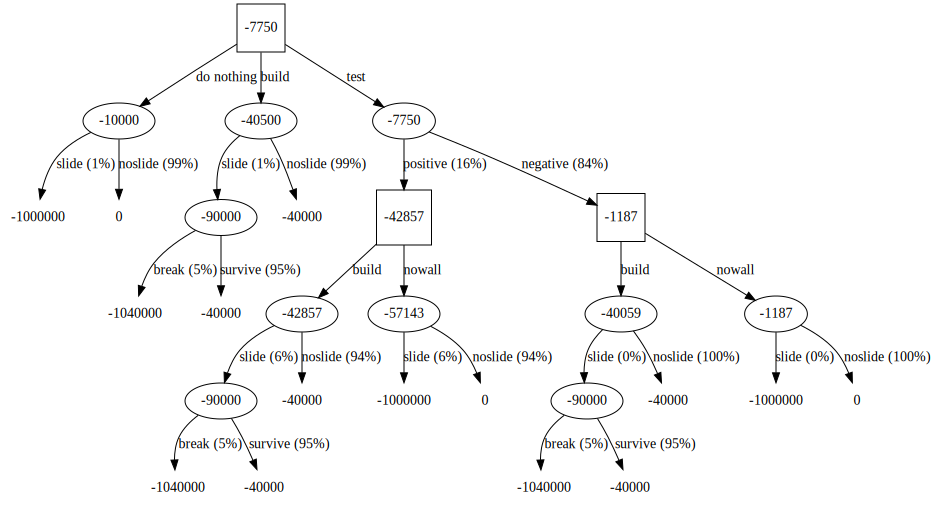

In [19]:
import numpy as np
from decisiontrees import Node
prob_slide = 0.01
prob_noslide = 1-prob_slide
prob_breakwall = 0.05
prob_wallsurvives = 1-prob_breakwall

prob_pos_given_slide = 0.9
prob_neg_given_noslide = 0.85

damage = 1000000
wall_cost = 40000
test_cost =0

##Build the Decision Tree by defining the various Nodes (27)
def buildtree():
    prob_pos_slide = prob_pos_given_slide*prob_slide
    prob_neg_noslide = prob_neg_given_noslide*prob_noslide
    prob_pos_noslide = prob_noslide - prob_neg_noslide
    prob_neg_slide = prob_slide - prob_pos_slide
    prob_pos = prob_pos_slide + prob_pos_noslide
    prob_neg = prob_neg_slide+prob_neg_noslide
    
    prob_slide_given_pos = prob_pos_slide/prob_pos
    prob_noslide_given_pos = prob_pos_noslide/prob_pos
    
    prob_slide_given_neg = prob_neg_slide/prob_neg
    prob_noslide_given_neg = prob_neg_noslide/prob_neg
    
    
    donothing_slide = Node('slide',value = -damage)
    donothing_noslide = Node('noslide',value=0)
    donothing = Node('do nothing',[donothing_slide,donothing_noslide],[prob_slide,prob_noslide])
    
    build_slide_breaks = Node('break',value=-(damage+wall_cost))
    build_slide_survive = Node('survive',value = -wall_cost)
    build_noslide = Node('noslide',value=-wall_cost)
    build_slide = Node('slide',[build_slide_breaks,build_slide_survive],[prob_breakwall,prob_wallsurvives])
    no_test_build =Node('build',[build_slide,build_noslide],[prob_slide,prob_noslide])
    
    pos_build_slide_breaks=Node('break',value=-(damage+wall_cost+test_cost))
    pos_build_slide_survive = Node('survive',value=-(wall_cost+test_cost))
    pos_build_slide = Node('slide',[pos_build_slide_breaks,pos_build_slide_survive],[prob_breakwall,prob_wallsurvives])
    pos_build_noslide = Node('noslide',value=-(wall_cost+test_cost))
    pos_build = Node('build',[pos_build_slide,pos_build_noslide],[prob_slide_given_pos,prob_noslide_given_pos])
    pos_nowall_slide = Node('slide',value=-(damage+test_cost))
    pos_nowall_noslide = Node('noslide',value=-test_cost)
    pos_nowall = Node('nowall',[pos_nowall_slide,pos_nowall_noslide],[prob_slide_given_pos,prob_noslide_given_pos])
    pos = Node('positive',[pos_build,pos_nowall])
    
    neg_build_slide_break = Node('break',value=-(damage+wall_cost+test_cost))
    neg_build_slide_survive = Node('survive',value = -(test_cost+wall_cost))
    neg_build_noslide = Node('noslide',value=-(wall_cost+test_cost))
    neg_build_slide = Node('slide',[neg_build_slide_break,neg_build_slide_survive],[prob_breakwall,prob_wallsurvives])
    neg_build = Node('build',[neg_build_slide,neg_build_noslide],[prob_slide_given_neg,prob_noslide_given_neg])
    neg_nowall_slide = Node('slide',value = -(test_cost+damage))
    neg_nowall_noslide = Node('noslide',value=-test_cost)
    neg_nowall = Node('nowall',[neg_nowall_slide,neg_nowall_noslide],[prob_slide_given_neg,prob_noslide_given_neg])
    neg = Node('negative',[neg_build,neg_nowall])
    
    test = Node('test',[pos,neg],[prob_pos,prob_neg])
    
    decision = Node('Decide', [donothing,no_test_build,test])
    if max(donothing.evaluate(),no_test_build.evaluate(),test.evaluate())==test.evaluate():
        print("The Mayor should pay maximum of",round(test.evaluate()-max(donothing.evaluate(),no_test_build.evaluate())),"dollars for the test")
    else: 
        print("The Mayor should not order the test")   
    return decision

decision = buildtree()
graph = decision.graph()
display(graph)



The probability of slide is 0.0
The Mayor should pay maximum of 0.0 dollars for the test
The probability of slide is 0.01
The Mayor should pay maximum of 2250.0 dollars for the test
The probability of slide is 0.02
The Mayor should pay maximum of 10440.0 dollars for the test
The probability of slide is 0.03
The Mayor should pay maximum of 18630.0 dollars for the test
The probability of slide is 0.04
The Mayor should pay maximum of 26820.0 dollars for the test
The probability of slide is 0.05
The Mayor should pay maximum of 29110.0 dollars for the test
The probability of slide is 0.06
The Mayor should pay maximum of 28200.0 dollars for the test
The probability of slide is 0.07
The Mayor should pay maximum of 27290.0 dollars for the test
The probability of slide is 0.08
The Mayor should pay maximum of 26380.0 dollars for the test
The probability of slide is 0.09
The Mayor should pay maximum of 25470.0 dollars for the test
The probability of slide is 0.1
The Mayor should pay maximum of 24

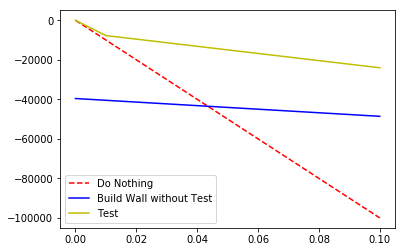

In [25]:
##Sensitivity Analysis for Probability of Slide occuring
prob_slide = 0.01
prob_noslide = 1-prob_slide
prob_breakwall = 0.05
prob_wallsurvives = 1-prob_breakwall

prob_pos_given_slide = 0.9
prob_neg_given_noslide = 0.85

damage = 1000000
wall_cost = 40000
test_cost =0
##build the sensitivity analysis
import matplotlib.pyplot as plt
##define the range of probabilities for sensitivity testing
prob = np.linspace(0.001,0.1,1000)
##define the list which shall store the values for each decision node for each value of probability
nothing = []
build_notest = []
test = []
for i in prob:
    prob_slide = i
    print("The probability of slide is", prob_slide)
    #define a tree which calls buildtree() and builds the tree for each iteration
    tree = buildtree()
    ##assign the children of this tree to 3 different nodes which we will evaluate
    donothingNode,buildnotestNode, testNode = tree.children
    nothing.append(donothingNode.evaluate())
    build_notest.append(buildnotestNode.evaluate())
    test.append(testNode.evaluate())

plt.plot(prob,nothing,'r--',label='Do Nothing')
plt.plot(prob,build_notest,'b-',label = 'Build Wall without Test')
plt.plot(prob,test,'y',label = 'Test')
plt.legend()
plt.show()

The Mayor should pay maximum of 2250.0 dollars for the test
The Mayor should pay maximum of 10800.0 dollars for the test
The Mayor should pay maximum of 19350.0 dollars for the test
The Mayor should pay maximum of 27900.0 dollars for the test
The Mayor should pay maximum of 28950.0 dollars for the test


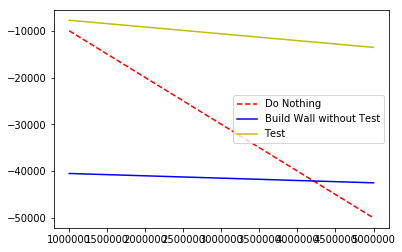

In [28]:
##sensitivity analysis on damage cost
prob_slide = 0.01
prob_noslide = 1-prob_slide
prob_breakwall = 0.05
prob_wallsurvives = 1-prob_breakwall

prob_pos_given_slide = 0.9
prob_neg_given_noslide = 0.85

damage = 1000000
wall_cost = 40000
test_cost =0
##build the sensitivity analysis
import matplotlib.pyplot as plt
##define the range of probabilities for sensitivity testing
slideDamage = np.linspace(1000000,5000000,5)
##define the list which shall store the values for each decision node for each value of probability
nothing = []
build_notest = []
test = []
for i in slideDamage:
    damage = i
    #define a tree which calls buildtree() and builds the tree for each iteration
    tree = buildtree()
    ##assign the children of this tree to 3 different nodes which we will evaluate
    donothingNode,buildnotestNode, testNode = tree.children
    nothing.append(donothingNode.evaluate())
    build_notest.append(buildnotestNode.evaluate())
    test.append(testNode.evaluate())

plt.plot(slideDamage,nothing,'r--',label='Do Nothing')
plt.plot(slideDamage,build_notest,'b-',label = 'Build Wall without Test')
plt.plot(slideDamage,test,'y',label = 'Test')
plt.legend()
plt.show()

The Mayor should pay maximum of 5400.0 dollars for the test
The Mayor should pay maximum of 3825.0 dollars for the test
The Mayor should pay maximum of 2250.0 dollars for the test
The Mayor should pay maximum of 675.0 dollars for the test
The Mayor should pay maximum of 0 dollars for the test
The Mayor should pay maximum of 0 dollars for the test
The Mayor should pay maximum of 0 dollars for the test
The Mayor should pay maximum of 0 dollars for the test
The Mayor should pay maximum of 0 dollars for the test


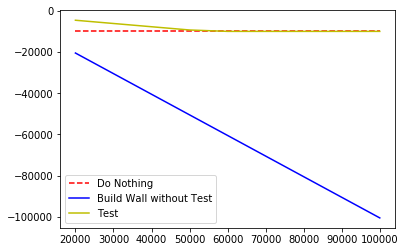

In [27]:
##sensitivity analysis on wall cost
prob_slide = 0.01
prob_noslide = 1-prob_slide
prob_breakwall = 0.05
prob_wallsurvives = 1-prob_breakwall

prob_pos_given_slide = 0.9
prob_neg_given_noslide = 0.85

damage = 1000000
wall_cost = 40000
test_cost =0
##build the sensitivity analysis
import matplotlib.pyplot as plt
##define the range of probabilities for sensitivity testing
wallCost = np.linspace(20000,100000,9)
##define the list which shall store the values for each decision node for each value of probability
nothing = []
build_notest = []
test = []
for i in wallCost:
    wall_cost = i
    #define a tree which calls buildtree() and builds the tree for each iteration
    tree = buildtree()
    ##assign the children of this tree to 3 different nodes which we will evaluate
    donothingNode,buildnotestNode, testNode = tree.children
    nothing.append(donothingNode.evaluate())
    build_notest.append(buildnotestNode.evaluate())
    test.append(testNode.evaluate())

plt.plot(wallCost,nothing,'r--',label='Do Nothing')
plt.plot(wallCost,build_notest,'b-',label = 'Build Wall without Test')
plt.plot(wallCost,test,'y',label = 'Test')
plt.legend()
plt.show()